### Problem Statement: To Predict how likely individuals are to receive their H1N1 and Seasonal Flu Vaccines.

### Aim: 

* To create and assess machine learning models that can precisely determine if individuals are likely to obtain the H1N1 and/or seasonal flu vaccines, utilizing demographic, behavioral, and health-related characteristics.


### Dataset Overview:

* training_set_features.csv

Rows: 26,707

Columns: 36

Contains demographic, behavioral, and health-related survey responses.

* test_set_features.csv

Rows: 26,708

Columns: 36

Same structure as training features, without the vaccination labels.

* training_set_labels.csv

Rows: 26,707

Columns: 3

Contains vaccination labels for H1N1 and seasonal flu.


* The dataset consists of survey responses gathered to comprehend the factors affecting the adoption of H1N1 and seasonal flu vaccinations. It contains three primary files: features for training, labels for training, and features for testing. The training dataset includes 26,707 entries and 36 attributes, encompassing a diverse array of demographic, behavioral, health-related, and attitudinal factors. 



### Objective:

* Understand the dataset by performing exploratory data analysis (EDA) to identify patterns, distributions, and missing values.

* Handle missing data using appropriate imputation techniques, such as KNN imputation.

* Preprocess the data through encoding of categorical variables and normalization where required.

* Address class imbalance, particularly in the H1N1 vaccine target variable, using techniques like SMOTE.

* Build and compare multiple classification models, including:

- Logistic Regression

- Decision Tree

- Random Forest

- Gradient Boosting

- Support Vector Machine (SVM)

- Naive Bayes

* Evaluate model performance using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

* Select the best-performing model for each vaccine type and interpret the results.

* Submit predictions to the competition platform (e.g., DrivenData) and analyze leaderboard performance.

* Draw conclusions and suggest recommendations based on findings, including public health insights or targeted outreach strategies.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\coolr\Dropbox\PC\Desktop\Project"

C:\Users\coolr\Dropbox\PC\Desktop\Project


In [3]:
vaccinetrain = pd.read_csv("training_set_features.csv")
vaccinetest = pd.read_csv("test_set_features.csv")
vaccinelabels = pd.read_csv("training_set_labels.csv")

In [4]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(vaccinelabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [5]:
vaccinetrain.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [6]:
vaccinetest.isnull().sum().sort_values(ascending=False)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_seas_sick_from_vacc      521
opinion_seas_risk                499
opinion_seas_vacc_effective      452
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
b

## Columns:

In [7]:
vaccinetrain.columns

# To know the column names in the dataset 

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [8]:
vaccinetest.columns

# To know the column names in the dataset 

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [9]:
vaccinelabels.columns

# To know the column names in the dataset 

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [10]:
# Since there are missing values in both Train and Test Set Im combining both the Datasets
combinedf = pd.concat([vaccinetrain,vaccinetest],axis=0) # Row Concatenation 

In [11]:
# info() method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, 
#Dtype of the data, and Memory Usage.
combinedf.info()
# Many Variables have Null Values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

### Missing Value Imputation: Strategy (KNN Imputer)
* KNN is a non parametric algorithm that uses distance like Euclidean to calculate distance between missing value and closest 5 neighbors(rows) and smallest distance value is imputed.
* Before applying KNN imputer labelencoding of data must be done

In [12]:
from sklearn.preprocessing import LabelEncoder

C:\Users\coolr\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
stringcols=combinedf.drop(['respondent_id'],axis=1)

In [14]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
LabelEncoder().fit_transform(series[series.notnull()]),index = series[series.notnull()].index))

In [15]:
from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer()

In [17]:
stringcolsimp = imputer.fit_transform(stringcols)

In [18]:
stringcolsimp = pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [19]:
stringcolsimp.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,10.0,11.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,10.0,11.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0


### Splitting back the data to Train data and Test data

In [20]:
vaccinetraindf = stringcolsimp.loc[0:26706]

In [21]:
vaccinetestdf = stringcolsimp.loc[26708:53415]

In [22]:
vaccinetraindf.shape

(26707, 35)

In [23]:
vaccinetestdf.shape

(26707, 35)

### Hypothesis Testing:
### a.) Seasonal Vaccine

In [24]:
from scipy.stats import chi2_contingency

In [25]:
# Null Hypothesis : There is Significance between seasonalvaccine and sex
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.sex)

sex,0.0,1.0
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [26]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.sex))
# Since p value < 0.05 reject null 

(158.40462897107128,
 2.5248076319253385e-36,
 1,
 array([[8474.38409406, 5797.61590594],
        [7383.61590594, 5051.38409406]]))

In [27]:
# Null Hypothesis : There is Significance between seasonalvaccine and income_poverty
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.income_poverty)

income_poverty,0.0,1.0,2.0,3.0
seasonal_vaccine,,,,
0,6686,3427,1719,2440
1,6091,3383,978,1983


In [28]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.income_poverty))
# Since p value < 0.05 reject null 

(153.17012658009583,
 5.455880245363045e-33,
 3,
 array([[6827.92316621, 3639.20769836, 1441.25450256, 2363.61463287],
        [5949.07683379, 3170.79230164, 1255.74549744, 2059.38536713]]))

In [29]:
# Null Hypothesis : There is Significance between seasonalvaccine and education
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.education)

education,0.0,1.0,2.0,3.0,4.0
seasonal_vaccine,,,,,
0,3199,1415,4933,3860,865
1,2598,948,5164,3183,542


In [30]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.education))
# Since p value < 0.05 reject null 

(173.57815735793127,
 1.7841137139002192e-36,
 4,
 array([[3097.86887333, 1262.76766391, 5395.7533231 , 3763.72097203,
          751.88916763],
        [2699.13112667, 1100.23233609, 4701.2466769 , 3279.27902797,
          655.11083237]]))

In [31]:
# Null Hypothesis : There is Significance between seasonalvaccine and doctor_recc_seasonal
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.doctor_recc_seasonal)

doctor_recc_seasonal,0.0,1.0,2.0
seasonal_vaccine,,,
0,10756,2117,1399
1,5697,5977,761


In [32]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.doctor_recc_seasonal))
# Since p value < 0.05 reject null 

(3474.902794649153,
 0.0,
 2,
 array([[8792.3471749 , 4325.36668289, 1154.28614221],
        [7660.6528251 , 3768.63331711, 1005.71385779]]))

In [33]:
# Null Hypothesis : There is Significance between seasonalvaccine and behavioral_face_mask
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.behavioral_face_mask)

behavioral_face_mask,0.0,1.0,2.0
seasonal_vaccine,,,
0,13449,815,8
1,11398,1026,11


In [34]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.behavioral_face_mask))
# Since p value < 0.05 reject null 

(67.92302367431634,
 1.7811595018273916e-15,
 2,
 array([[1.32780314e+04, 9.83815180e+02, 1.01534429e+01],
        [1.15689686e+04, 8.57184820e+02, 8.84655708e+00]]))

###  b.) H1N1_ Vaccine

In [35]:
# Null Hypothesis : There is no significance between h1n1vaccine and sex
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.sex)

sex,0.0,1.0
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [36]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.sex))
# Since p value < 0.05 reject null 

(11.309981152455997,
 0.0007709155489949327,
 1,
 array([[12488.90979893,  8544.09020107],
        [ 3369.09020107,  2304.90979893]]))

In [37]:
# Null Hypothesis : There is no significance between seasonalvaccine and income_poverty
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.income_poverty)

income_poverty,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,10178,5087,2181,3587
1,2599,1723,516,836


In [38]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.income_poverty))
# Since p value < 0.05 reject null 

(94.91226392182662,
 1.9282818704757377e-20,
 3,
 array([[10062.4795372 ,  5363.19054929,  2124.01246864,  3483.31744486],
        [ 2714.5204628 ,  1446.80945071,   572.98753136,   939.68255514]]))

In [39]:
# Null Hypothesis : There is no significance between h1n1_vaccine and education
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.education)

education,0.0,1.0,2.0,3.0,4.0
h1n1_vaccine,,,,,
0,4726,1968,7614,5579,1146
1,1071,395,2483,1464,261


In [40]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.education))
# Since p value < 0.05 reject null 

(130.12342530584624,
 3.66443514946588e-27,
 4,
 array([[4565.40611076, 1860.97199236, 7951.85535627, 5546.68884562,
         1108.07769499],
        [1231.59388924,  502.02800764, 2145.14464373, 1496.31115438,
          298.92230501]]))

In [41]:
# Null Hypothesis : There is no significance between h1n1_vaccine and doctor_recc_seasonal
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.doctor_recc_seasonal)

doctor_recc_seasonal,0.0,1.0,2.0
h1n1_vaccine,,,
0,13783,5275,1975
1,2670,2819,185


In [42]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.doctor_recc_seasonal))
# Since p value < 0.05 reject null 

(1347.6234370031846,
 2.329639991754564e-293,
 2,
 array([[12957.49986895,  6374.40004493,  1701.10008612],
        [ 3495.50013105,  1719.59995507,   458.89991388]]))

In [43]:
# Null Hypothesis : There is no significance between h1n1_vaccine and behavioral_face_mask
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.behavioral_face_mask)

behavioral_face_mask,0.0,1.0,2.0
h1n1_vaccine,,,
0,19765,1255,13
1,5082,586,6


In [44]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.behavioral_face_mask))
# Since p value < 0.05 reject null 

(133.81661811498145,
 8.751662937660443e-30,
 2,
 array([[1.95681638e+04, 1.44987280e+03, 1.49633804e+01],
        [5.27883619e+03, 3.91127195e+02, 4.03661961e+00]]))

In [45]:
y1 = vaccinelabels.h1n1_vaccine 
y  = vaccinelabels.seasonal_vaccine
X  = vaccinetraindf

<AxesSubplot: ylabel='Frequency'>

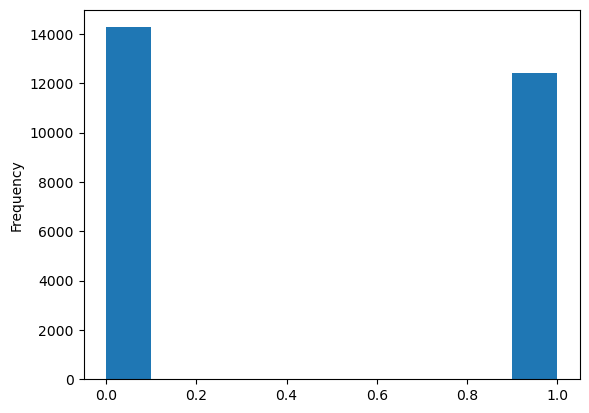

In [46]:
vaccinelabels.seasonal_vaccine.plot(kind='hist')
# Balanced Data

<AxesSubplot: ylabel='Frequency'>

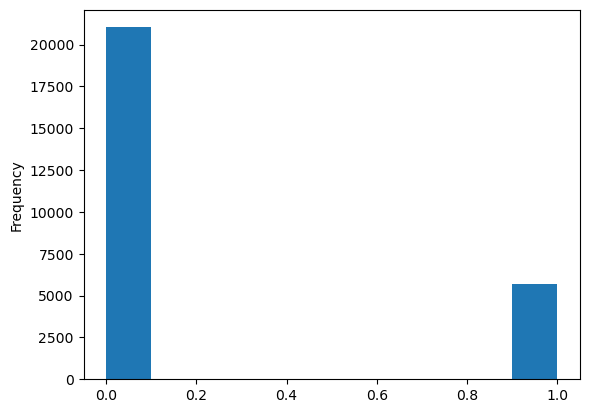

In [47]:
vaccinelabels.h1n1_vaccine.plot(kind='hist')
# Imbalance Data

# Methods

## Model Building and Idealogy : 
* As there are two binary variables to target, Let's create a classification model for each variable separately.
* The variable seasonal vaccine is balanced, whereas the h1n1 vaccine variable is not.
* Let's use SMOTE to balance the h1n1 vaccine variable.

In [48]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

### Logistic Regression for Seasonal Vaccine 

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logit = LogisticRegression(max_iter=300)

In [51]:
logitmodel= logit.fit(X,y)

In [52]:
logitmodel.score(X,y)

0.7610738757629086

In [53]:
cross_val_score(logitmodel,X,y)

array([0.75739423, 0.75870461, 0.76427635, 0.76652312, 0.75360419])

In [54]:
np.mean([0.75739423, 0.759079  , 0.76427635, 0.76671035, 0.75360419])

0.760212824

In [55]:
logitpredict = logitmodel.predict(X)

In [56]:
logitpredict_test = logitmodel.predict_proba(vaccinetestdf)

In [57]:
pd.DataFrame(logitpredict_test).to_csv("seaslog.csv")

In [58]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [59]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11277,2995
1,3386,9049


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


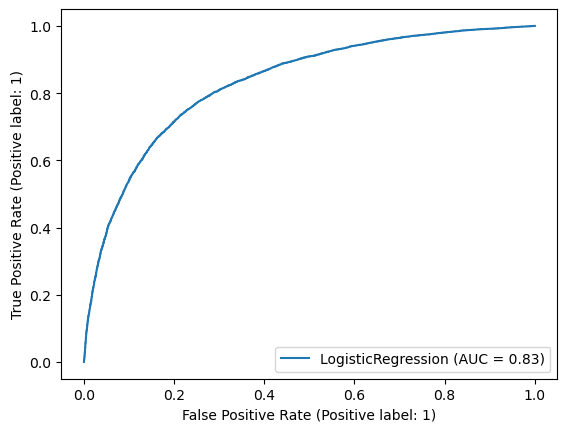

In [60]:
plot_roc_curve(logitmodel,X,y)

### Decision Tree Classification for Seasonal Vaccine 

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree = DecisionTreeClassifier(max_depth=16)

In [63]:
treemodel = tree.fit(X,y)

In [64]:
treemodel.score(X,y)

0.9402029430486389

In [65]:
cross_val_score(treemodel,X,y)

array([0.69842756, 0.70254586, 0.70717094, 0.71241341, 0.69930725])

In [66]:
np.mean([0.6963684 , 0.70647697, 0.70642202, 0.71241341, 0.69668601])

0.7036733620000001

In [67]:
treepredict = treemodel.predict(X)

In [68]:
treepredict_test = treemodel.predict(vaccinetestdf)

In [69]:
pd.DataFrame(treepredict_test).to_csv("seastree.csv")

In [70]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14272
           1       0.94      0.93      0.94     12435

    accuracy                           0.94     26707
   macro avg       0.94      0.94      0.94     26707
weighted avg       0.94      0.94      0.94     26707



In [71]:
pd.crosstab(y,treepredict)

col_0,0,1
seasonal_vaccine,,
0,13508,764
1,833,11602


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


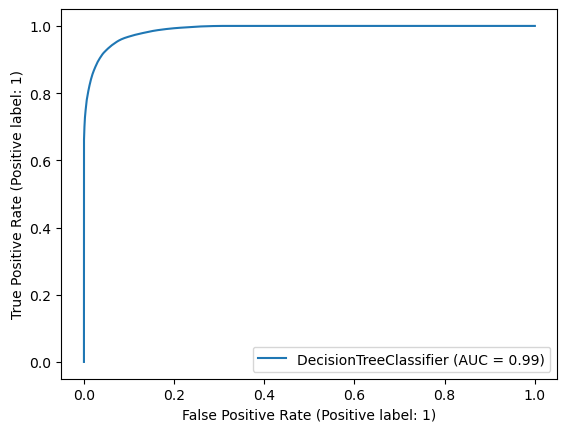

In [72]:
plot_roc_curve(treemodel,X,y)

### Random Forest Classification for Seasonal Vaccine 

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
RF = RandomForestClassifier(n_estimators=3)

In [75]:
RFmodel = RF.fit(X,y)

In [76]:
RFmodel.score(X,y)

0.9460441082862171

In [77]:
cross_val_score(RFmodel,X,y)

array([0.71602396, 0.71246724, 0.72477064, 0.71934095, 0.70941771])

In [78]:
np.mean([0.70497941, 0.70778735, 0.71316233, 0.72477064, 0.71035387])

0.7122107200000001

In [79]:
RFpredict = RFmodel.predict(X)

In [80]:
RFpredict_test = RFmodel.predict_proba(vaccinetestdf)

In [81]:
pd.DataFrame(RFpredict_test).to_csv('RFseas.csv')

In [82]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14272
           1       0.94      0.94      0.94     12435

    accuracy                           0.95     26707
   macro avg       0.95      0.95      0.95     26707
weighted avg       0.95      0.95      0.95     26707



In [83]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,13589,683
1,758,11677


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


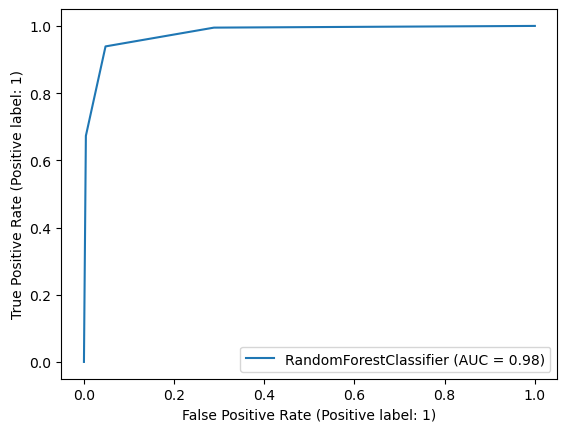

In [84]:
plot_roc_curve(RFmodel,X,y)

### Gradient Boosting Classification  for Seasonal Vaccine 

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbm= GradientBoostingClassifier(n_estimators=4000)

In [87]:
gbmmodel = gbm.fit(X,y)

In [88]:
gbmmodel.score(X,y)

0.8566667914778897

In [89]:
cross_val_score(gbmmodel,X,y) 

array([0.77031075, 0.77162112, 0.77588467, 0.78168882, 0.77813144])

In [90]:
np.mean([0.77405466, 0.77461625, 0.77925482, 0.78674406, 0.78468452])

0.7798708619999999

In [91]:
gbmpredict = gbmmodel.predict(X)

In [92]:
gbmpredict_test = gbmmodel.predict_proba(vaccinetestdf)

In [93]:
pd.DataFrame(gbmpredict_test).to_csv('gbmseas.csv')

In [94]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     14272
           1       0.85      0.84      0.84     12435

    accuracy                           0.86     26707
   macro avg       0.86      0.86      0.86     26707
weighted avg       0.86      0.86      0.86     26707



In [95]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12460,1812
1,2016,10419


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


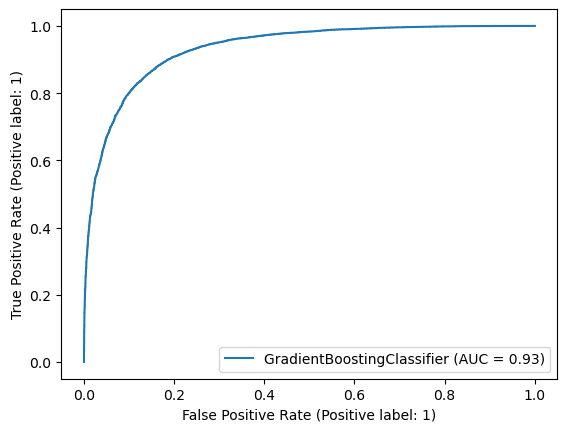

In [96]:
plot_roc_curve(gbmmodel,X,y)

### Support Vector Machine Classification for Seasonal Vaccine 

In [97]:
from sklearn.svm import SVC

In [98]:
svm = SVC()

In [99]:
svmmodel = svm.fit(X,y)

In [100]:
svmmodel.score(X,y)

0.7783352679072902

In [101]:
cross_val_score(svmmodel,X,y)

array([0.76843879, 0.76506926, 0.77682082, 0.77625913, 0.77195282])

In [102]:
np.mean([0.76843879, 0.76506926, 0.77682082, 0.77625913, 0.77195282])

0.7717081640000001

In [103]:
svmpredict_test = svmmodel.predict(X)

In [104]:
pd.DataFrame(svmpredict_test).to_csv('svmseas.csv')

In [105]:
print(classification_report(y,svmpredict_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



In [106]:
pd.crosstab(y,svmpredict_test)

col_0,0,1
seasonal_vaccine,,
0,11580,2692
1,3228,9207


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


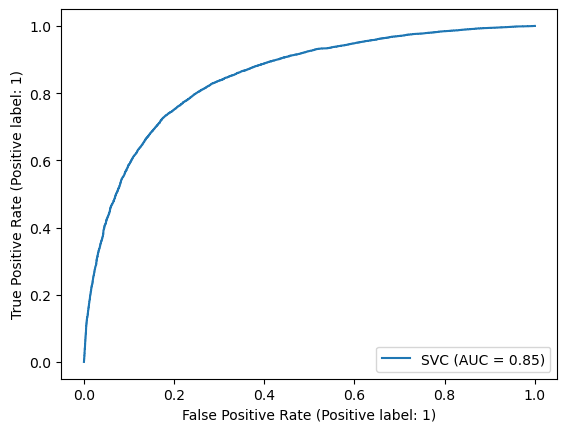

In [107]:
plot_roc_curve(svmmodel,X,y)

### Navie Bayes Classification for Seasonal Vaccine

In [108]:
from sklearn.naive_bayes import BernoulliNB

In [109]:
nb = BernoulliNB()

In [110]:
nbmodel = nb.fit(X,y)

In [111]:
nbmodel.score(X,y)

0.6936383719624069

In [112]:
cross_val_score(nbmodel,X,y)

array([0.68045676, 0.70423063, 0.69106909, 0.69855832, 0.68938401])

In [113]:
np.mean([0.68045676, 0.70423063, 0.69106909, 0.69855832, 0.68938401])

0.692739762

In [114]:
nbpredict = nbmodel.predict(X)

In [115]:
nbpredict_test = nbmodel.predict_proba(vaccinetestdf)

In [116]:
pd.DataFrame(nbpredict_test).to_csv('nbseas.csv')

In [117]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71     14272
           1       0.66      0.70      0.68     12435

    accuracy                           0.69     26707
   macro avg       0.69      0.69      0.69     26707
weighted avg       0.69      0.69      0.69     26707



In [118]:
pd.crosstab(y,nbpredict)

col_0,0,1
seasonal_vaccine,,
0,9878,4394
1,3788,8647


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


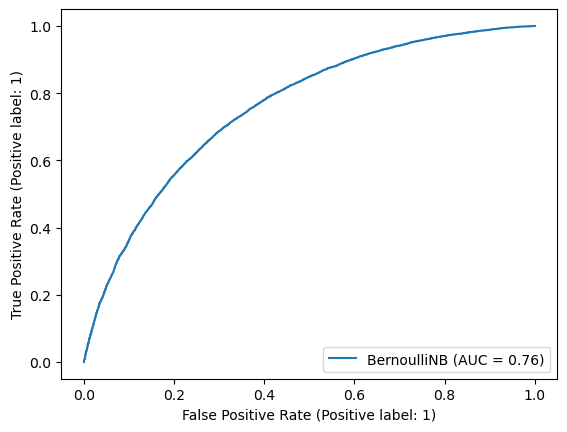

In [119]:
plot_roc_curve(nbmodel,X,y)

# Balancing the Imbalance data using Smote

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smote = SMOTE(random_state=60)

In [122]:
X_smote,y_smote = smote.fit_resample(X,y1)

In [123]:
print(pd.DataFrame(y1).value_counts())
print(pd.DataFrame(y_smote).value_counts())

h1n1_vaccine
0               21033
1                5674
dtype: int64
h1n1_vaccine
0               21033
1               21033
dtype: int64


### Logistic Regression for H1N1 Vaccine

In [124]:
print(X_smote.shape)
print(y_smote.shape)

(42066, 35)
(42066,)


In [125]:
logit2 = LogisticRegression(max_iter=400)

In [126]:
logitmodel_smote = logit2.fit(X_smote,y_smote)

In [127]:
logitmodel_smote.score(X_smote,y_smote)

0.762943945228926

In [128]:
cross_val_score(logitmodel_smote,X_smote,y_smote)

array([0.75112907, 0.75680494, 0.76726495, 0.77011768, 0.76667063])

In [129]:
np.mean([0.75124792, 0.75692381, 0.76714608, 0.77011768, 0.76678949])

0.7624449959999999

In [130]:
logitsmote_predict = logitmodel_smote.predict(X_smote)

In [131]:
logitsmote_predict_test = logitmodel_smote.predict_proba(vaccinetestdf)

In [132]:
pd.DataFrame(logitsmote_predict_test).to_csv('h1n1log.csv')

In [133]:
print(classification_report(y_smote,logitsmote_predict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     21033
           1       0.76      0.77      0.76     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



In [134]:
pd.crosstab(y_smote,logitsmote_predict)

col_0,0,1
h1n1_vaccine,,
0,15990,5043
1,4929,16104


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


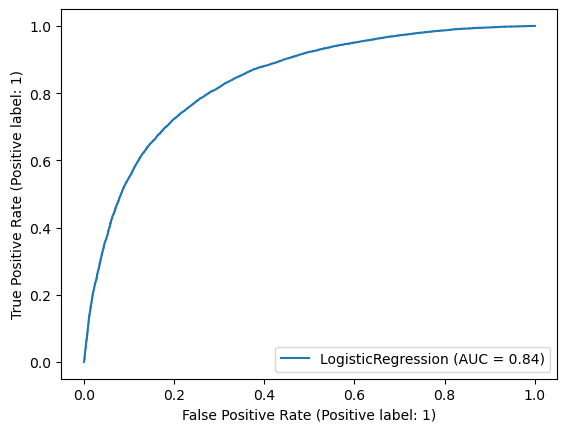

In [135]:
plot_roc_curve(logitmodel_smote,X_smote,y_smote)

### Decision Tree Classification for H1N1 Vaccine : 

In [136]:
treesmote = DecisionTreeClassifier(max_depth=11)

In [137]:
treemodel_smote = treesmote.fit(X_smote,y_smote)

In [138]:
treemodel_smote.score(X_smote,y_smote)

0.9075262682451386

In [139]:
cross_val_score(treemodel_smote,X_smote,y_smote)

array([0.69562634, 0.85379769, 0.93022703, 0.93640794, 0.93153453])

In [140]:
np.mean([0.69550749, 0.85391656, 0.93010817, 0.9365268 , 0.93212885])

0.8696375740000001

In [141]:
treepredict_smote = treemodel_smote.predict(X_smote)

In [142]:
treepredict_smote_test =treemodel_smote.predict_proba(vaccinetestdf)

In [143]:
pd.DataFrame(treepredict_smote_test).to_csv('h1n1tree.csv')

In [144]:
print(classification_report(y_smote,treepredict_smote))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     21033
           1       0.94      0.87      0.90     21033

    accuracy                           0.91     42066
   macro avg       0.91      0.91      0.91     42066
weighted avg       0.91      0.91      0.91     42066



In [145]:
pd.crosstab(y_smote,treepredict_smote)

col_0,0,1
h1n1_vaccine,,
0,19880,1153
1,2737,18296


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


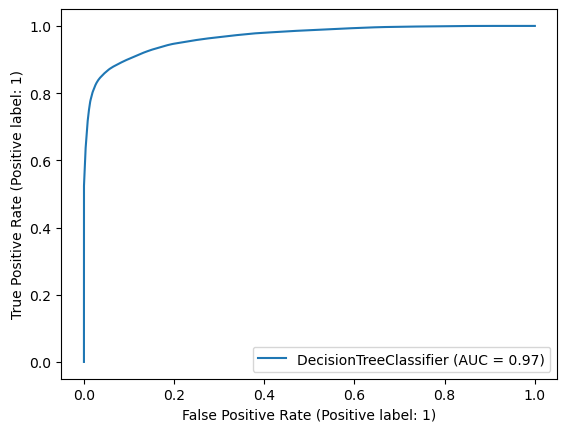

In [146]:
plot_roc_curve(treemodel_smote,X_smote,y_smote)

### Random Forest Classification for H1N1 Vaccine : 

In [147]:
RFsmote = RandomForestClassifier(n_estimators=7,max_depth=12)

In [148]:
RFmodel_smote = RFsmote.fit(X_smote,y_smote)

In [149]:
RFmodel_smote.score(X_smote,y_smote)

0.9265440022821281

In [150]:
cross_val_score(RFmodel_smote,X_smote,y_smote)

array([0.69681483, 0.88006656, 0.95245453, 0.95209794, 0.94449067])

In [151]:
np.mean([0.6931305 , 0.87388565, 0.94591703, 0.95304885, 0.94413408])

0.8820232220000002

In [152]:
RFsmote_predict = RFmodel_smote.predict(X_smote)

In [153]:
RFsmote_predict_test = RFmodel_smote.predict(vaccinetestdf)

In [154]:
pd.DataFrame(RFsmote_predict_test).to_csv('h1h1RF.csv')

In [155]:
print(classification_report(y_smote,RFsmote_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     21033
           1       0.95      0.90      0.92     21033

    accuracy                           0.93     42066
   macro avg       0.93      0.93      0.93     42066
weighted avg       0.93      0.93      0.93     42066



In [156]:
pd.crosstab(y_smote,RFsmote_predict)

col_0,0,1
h1n1_vaccine,,
0,20021,1012
1,2078,18955


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


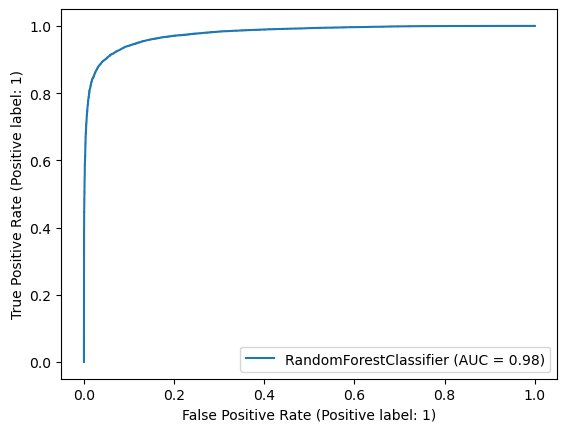

In [157]:
plot_roc_curve(RFmodel_smote,X_smote,y_smote)

### Gradient Boosting Classification for H1N1 Vaccine : 

In [158]:
gbm_smote = GradientBoostingClassifier(n_estimators=700)

In [159]:
gbmmodel_smote = gbm_smote.fit(X_smote,y_smote)

In [160]:
gbmmodel_smote.score(X_smote,y_smote)

0.9202443778823753

In [161]:
cross_val_score(gbmmodel_smote,X_smote,y_smote)

array([0.64879962, 0.88458338, 0.96576726, 0.96529181, 0.96208249])

In [162]:
np.mean([0.64606608, 0.8851777 , 0.96612386, 0.9656484 , 0.9630334 ])

0.885209888

In [163]:
gbmpredict_smote = gbmmodel_smote.predict(X_smote)

In [164]:
gbmpredict_smote_test = gbmmodel_smote.predict_proba(vaccinetestdf)

In [165]:
pd.DataFrame(gbmpredict_smote_test).to_csv('h1n1gbm.csv')

In [166]:
print(classification_report(y_smote,gbmpredict_smote))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     21033
           1       0.95      0.88      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



In [167]:
pd.crosstab(y_smote,gbmpredict_smote)

col_0,0,1
h1n1_vaccine,,
0,20099,934
1,2421,18612


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


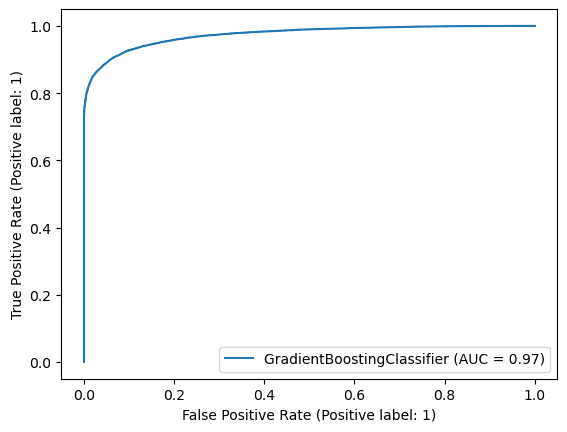

In [168]:
plot_roc_curve(gbmmodel_smote,X_smote,y_smote)

### Support Vector Classification for H1N1 Vaccine : 

In [169]:
svmmodel_smote = svm.fit(X_smote,y_smote)

In [170]:
svmmodel_smote.score(X_smote,y_smote)

0.8064470118385394

In [171]:
cross_val_score(svmmodel_smote,X_smote,y_smote)

array([0.75861659, 0.79044336, 0.81267087, 0.81564246, 0.80387496])

In [172]:
np.mean([0.75861659, 0.79044336, 0.81267087, 0.81564246, 0.80387496])

0.796249648

In [173]:
svmsmote_predict = svmmodel_smote.predict(X_smote)

In [174]:
svmsmote_predict_test = svmmodel_smote.predict(vaccinetestdf)

In [175]:
pd.DataFrame(svmsmote_predict_test).to_csv('h1n1svm.csv')

In [176]:
print(classification_report(y_smote,gbmpredict_smote))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     21033
           1       0.95      0.88      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



In [177]:
pd.crosstab(y_smote,gbmpredict_smote)

col_0,0,1
h1n1_vaccine,,
0,20099,934
1,2421,18612


C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


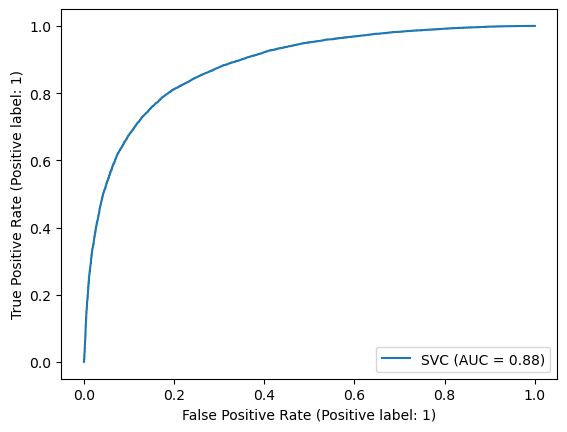

In [178]:
plot_roc_curve(svmmodel_smote,X_smote,y_smote)

### Naive Bayes Classification for H1N1 Vaccine : 

In [179]:
nbmodel_smote = nb.fit(X_smote,y_smote)

In [180]:
nbmodel_smote.score(X_smote,y_smote)

0.7696001521418723

In [181]:
cross_val_score(nbmodel_smote,X_smote,y_smote)

array([0.64606608, 0.75121835, 0.81397837, 0.81195768, 0.80744087])

In [182]:
np.mean([0.64606608, 0.75121835, 0.81397837, 0.81195768, 0.80744087])

0.76613227

In [183]:
nbsmote_predict = nbmodel_smote.predict(X_smote)

In [184]:
nbsmote_predict_test = nbmodel_smote.predict_proba(vaccinetestdf)

In [185]:
pd.DataFrame(nbsmote_predict_test).to_csv('h1n1nb.csv')

In [186]:
print(classification_report(y_smote,nbsmote_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     21033
           1       0.76      0.79      0.77     21033

    accuracy                           0.77     42066
   macro avg       0.77      0.77      0.77     42066
weighted avg       0.77      0.77      0.77     42066



In [187]:
pd.crosstab(y_smote,nbsmote_predict)

col_0,0,1
h1n1_vaccine,,
0,15716,5317
1,4375,16658


In [188]:
from sklearn.metrics import RocCurveDisplay

C:\Users\coolr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


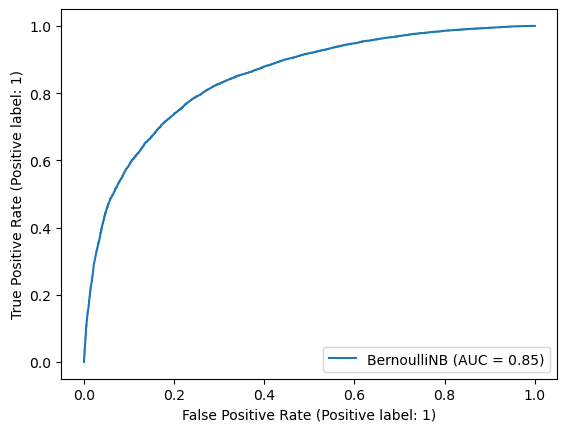

In [189]:
plot_roc_curve(nbmodel_smote,X_smote,y_smote)

# Results

# Performance Metric Report:
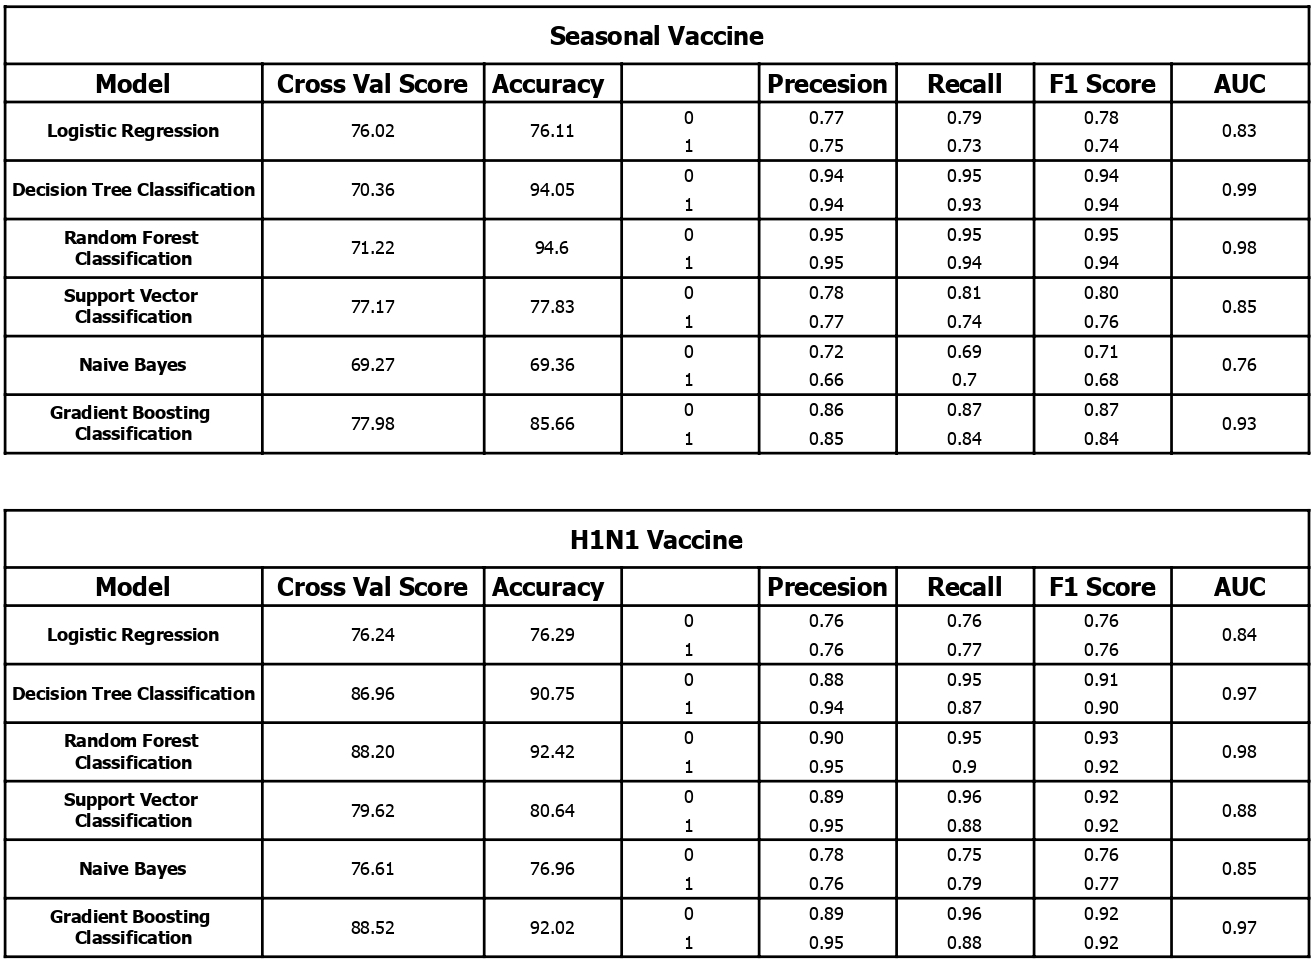

# Key Observation:


### Seasonal Vaccine prediction

- Gradient Boosting achieved the best balance of performance, with accuracy of 85.66% and AUC of 0.93.

- Random Forest and Decision Tree models also performed well, with very high recall and precision (AUCs of 0.98 and 0.99 respectively), though Decision Tree may be overfitting given its accuracy of 94.05% on a lower cross-validation score (70.36).

- Naive Bayes and Logistic Regression showed weaker generalization with lower accuracy and F1 scores.


### H1N1 Vaccine prediction

- Gradient Boosting again outperformed other models with accuracy of 92.02% and AUC of 0.97.

- Random Forest and Decision Tree closely followed, both showing high predictive power (AUC > 0.97).

- Support Vector Classification had strong recall (0.96 for class 0), which is valuable in public health applications where identifying individuals unlikely to take the vaccine is important.

- Naive Bayes and Logistic Regression underperformed compared to ensemble methods.


# Conclusion:

- For both vaccine types, Gradient Boosting Classification proved to be the most reliable and robust model. It achieved high scores across all evaluation metrics while balancing between precision and recall, making it highly suitable for public health prediction tasks. This model could help healthcare providers target outreach more effectively to individuals less likely to get vaccinated.




# References: 

### Aim ref:
* https://www.drivendata.org/competitions/66/flu-shot-learning/

### Objective ref:

* https://www.cdc.gov/mmwr/volumes/68/rr/rr6803a1.htm

### Data set I took from this website:

* https://www.drivendata.org/competitions/66/flu-shot-learning/data/